In [16]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
merged_df = pd.merge(ride_df,city_df,how="inner")
# Display the data table for preview
merged_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [17]:
fares = merged_df.groupby("city")["fare"].mean()
rides = merged_df.groupby("city")["ride_id"].count()
drivers = merged_df.groupby("city")["driver_count"].mean()
city_type = city_df.set_index("city")["type"]

cities = pd.DataFrame({"Average Fare per City": fares,
                       "Number of Rides": rides,
                       "Number of Drivers": drivers,
                       "Type of City":city_type
                      })

## Bubble Plot of Ride Sharing Data

Text(40,50,'Note: Circle size correlates with driver count per city.')

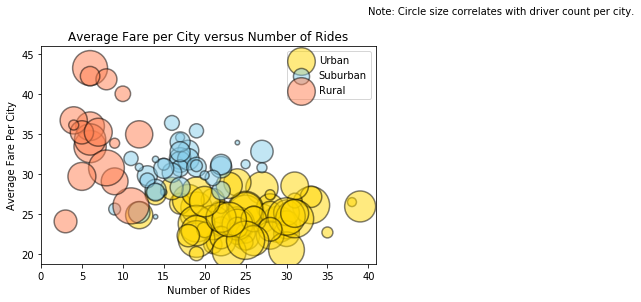

In [43]:
# Obtain the x and y coordinates for each of the three city types
urban = cities.loc[cities["Type of City"]== "Urban"]
suburban = cities.loc[cities["Type of City"]== "Suburban"]
rural = cities.loc[cities["Type of City"]== "Rural"]
                   
# Build the scatter plots for each city types
plt.scatter(urban["Number of Rides"], urban["Average Fare per City"], color = "gold", 
edgecolors="black", s = urban["Number of Drivers"]*20, 
label = "Urban", alpha = 0.5, linewidth = 1.5)
plt.scatter(suburban["Number of Rides"], suburban["Average Fare per City"], color = "skyblue", 
edgecolors="black", s = suburban["Number of Drivers"]*20, 
label = "Suburban", alpha = 0.5, linewidth = 1.5)
plt.scatter(rural["Number of Rides"], rural["Average Fare per City"], color = "coral", 
edgecolors="black", s = urban["Number of Drivers"]*20, 
label = "Rural", alpha = 0.5, linewidth = 1.5)
# Incorporate the other graph properties
plt.title("Average Fare per City versus Number of Rides")
plt.xlabel("Number of Rides")
plt.ylabel("Average Fare Per City")
# Create a legend
plt.legend(loc="upper right")
# Incorporate a text label regarding circle size
plt.text(40, 50,"Note: Circle size correlates with driver count per city.")
# Save Figure


In [28]:
# Show plot
plt.show()

## Total Fares by City Type

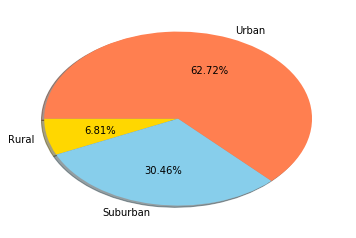

In [48]:
# Calculate Type Percents
fares_pie = merged_df.groupby(["type"])["fare"].sum()/100
# Build Pie Chart
colors = ["gold", "skyblue", "coral"]
plt.pie(fares_pie, labels = fares_pie.index, autopct = "%1.2f%%", colors = colors,shadow = True, startangle = 180)

# Save Figure
plt.show()

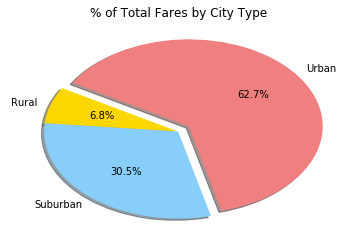

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

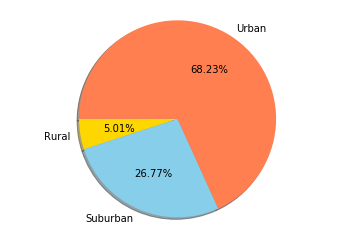

In [59]:
# Calculate Ride Percents
rides_pie = merged_df.groupby("type")["ride_id"].sum()/100
# Build Pie Chart
colors = ["gold", "skyblue", "coral"]
plt.pie(rides_pie, labels = rides_pie.index, autopct = "%1.2f%%", colors = colors,shadow = True, startangle = 180)
plt.axis("equal")
# Save Figure
plt.show()

In [53]:
# Show Figure


## Total Drivers by City Type

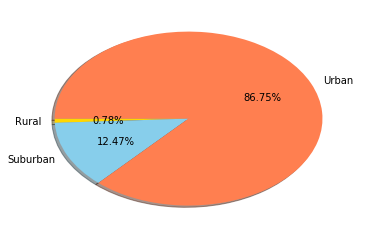

In [61]:
# Calculate Driver Percents
drivers_pie = merged_df.groupby("type")["driver_count"].sum()/100
# Build Pie Charts
colors = ["gold", "skyblue", "coral"]
plt.pie(drivers_pie, labels = drivers_pie.index, autopct = "%1.2f%%", colors = colors,shadow = True, startangle = 180)

# Save Figure
plt.show()

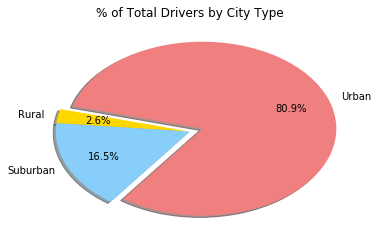

In [6]:
# Show Figure
plt.show()